In [8]:
import cdflib

from pyaw.configs import DATA_DIR

In [9]:
fp = DATA_DIR / "swarm/magnetic_field/low_resolution1/SW_OPER_MAGA_LR_1B_20250611T000000_20250611T235959_0606.CDF/SW_OPER_MAGA_LR_1B_20250611T000000_20250611T235959_0606_MDR_MAG_LR.cdf"

In [10]:
cdf_file = cdflib.CDF(fp)
info = cdf_file.cdf_info()

In [11]:
import pandas as pd


def read_MAGx_HR_1B(fp):
    cdf_file = cdflib.CDF(fp)
    info = cdf_file.cdf_info()
    df = pd.DataFrame()
    for zVariable in info.zVariables:
        zVariable_data = cdf_file.varget(zVariable)
        if len(zVariable_data.shape) > 1:
            df[zVariable] = list(zVariable_data)
        else:
            df[zVariable] = zVariable_data
    return df


df = read_MAGx_HR_1B(fp)

# b vfm

In [12]:
cdf_file.varattsget('B_VFM')

{'DESCRIPTION': 'Magnetic field vector, VFM frame', 'UNITS': 'nT'}

In [13]:
B_VFM = cdf_file.varget('B_VFM')

# b nec

In [14]:
cdf_file.varattsget('B_NEC')

{'DESCRIPTION': 'Magnetic field vector, NEC frame', 'UNITS': 'nT'}

In [15]:
B_NEC = cdf_file.varget('B_NEC')

# timestamps

In [16]:
cdf_file.varattsget('Timestamp')

{'DESCRIPTION': 'Time stamp', 'UNITS': '-'}

In [17]:
Timestamp = cdf_file.varget('Timestamp')

In [20]:
import numpy as np


def get_datetime(timestamp):
    # Create a numpy datetime object for Year 0, January 1, and the unit is millisecond
    ad0_reference = np.datetime64('0000-01-01', 'ms')
    # Convert the 'Timestamp' to datetime by adding the milliseconds since the epoch_reference
    # Assuming 'Timestamp' is in milliseconds
    return ad0_reference + np.array(timestamp, dtype='timedelta64[ms]')


df['datetime'] = get_datetime(df['Timestamp'])

# # Print the first few datetime values
# print(timestamps[:5])

In [21]:
from pyaw.utils import get_3arrays

bn, be, bc = get_3arrays(df['B_NEC'])

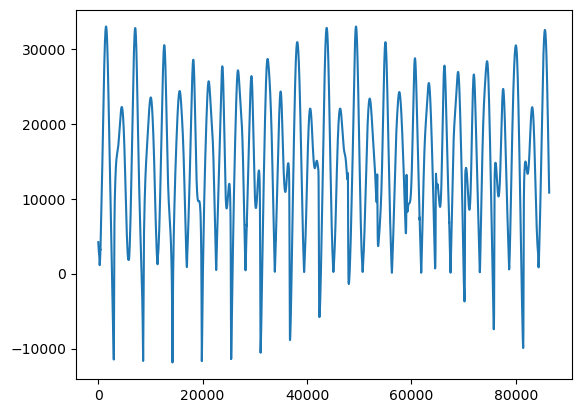

In [22]:
from matplotlib import pyplot as plt

plt.plot(bn)
plt.show()